In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import geeksw.hgcal.testbeam as hgc
import math

In [19]:
electron_runlist = hgc.runlist.query('Particle == "electron"')
electron_runlist = electron_runlist.query('Configuration == "22b"') 
electron_runlist = hgc.runlist.query("Particle == 'electron'").groupby("Energy").apply(lambda x : x.iloc[1])
energy = electron_runlist.Energy.values
electron_runlist

,Run,Date,Nevents,Particle,Energy,Configuration,CaloConfiguration
Energy,,,,,,,
20,437,2018-10-14 01:04:00,10274,electron,20,22b,1
30,595,2018-10-15 17:30:00,10291,electron,30,22b,1
50,457,2018-10-14 04:53:00,10050,electron,50,22b,1
80,467,2018-10-14 06:57:00,13423,electron,80,22b,1
100,479,2018-10-14 10:12:00,10240,electron,100,22b,1
120,621,2018-10-15 23:40:00,11361,electron,120,22b,1
150,494,2018-10-14 12:40:00,12220,electron,150,22b,1
200,665,2018-10-16 12:43:00,10239,electron,200,22b,1
250,385,2018-10-13 10:31:00,10161,electron,250,22b,1


In [6]:
#electron_runlist = hgc.runlist.query('Particle == "electron"')
#electron_runlist = electron_runlist.query('Configuration == "22b"') 
electron_runlist = hgc.runlist.query("Particle == 'electron'").query('Configuration == "22b"')#.groupby("Energy").apply(lambda x : x.iloc[[1,2,3,4]])


In [20]:
run_numbers = electron_runlist.Run.values
X0_meanvalue = []
X0_variance = []
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_X0", "rechit_energy"])
    total_sum = hdf.groupby(["event", "rechit_X0"]).sum()
    total_sum = total_sum.reset_index()
    total_sum = total_sum.groupby("rechit_X0").median()
    total_sum = total_sum.reset_index()
    total_sum["rechit_energy"] = total_sum["rechit_energy"]/total_sum["rechit_energy"].sum()
    rechitX0_sum = total_sum.rechit_X0
    rechit_energy_sum = total_sum.rechit_energy
    rechitX0_mean = (rechitX0_sum*rechit_energy_sum).sum()
    #rechitX0_variance = rechitX0.rechit_X0.std()
    X0_meanvalue.append(rechitX0_mean)
    print (run)
print (X0_meanvalue)
print (energy)
df = pd.DataFrame({
    "energy" : energy,
    "X0_meanvalue" : X0_meanvalue,
    })
#df.to_csv("Showermaximum_Beamenergy_plotting_electrons_22b.csv")
    #X0_variance.append(rechitX0_variance)
X0_meanvalue

437
595
457
467
479
621
494
665
385
406
[9.09082225458222, 9.104581041180122, 9.398236626895638, 9.740197107742825, 9.973170437821704, 10.138682157188933, 10.37936209817057, 10.644386481883759, 11.05281922305998, 11.140902345596832]
[ 20  30  50  80 100 120 150 200 250 300]


[9.09082225458222,
 9.104581041180122,
 9.398236626895638,
 9.740197107742825,
 9.973170437821704,
 10.138682157188933,
 10.37936209817057,
 10.644386481883759,
 11.05281922305998,
 11.140902345596832]

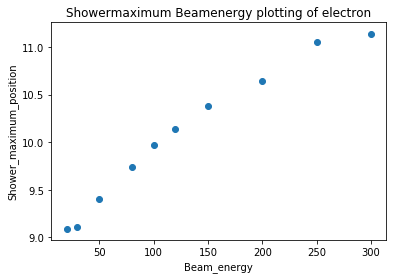

In [21]:
plt.scatter(energy, X0_meanvalue)
plt.xlabel("Beam_energy")
plt.ylabel("Shower_maximum_position")
plt.title("Showermaximum Beamenergy plotting of electron")
plt.show()

 
0.8094 x + 6.374


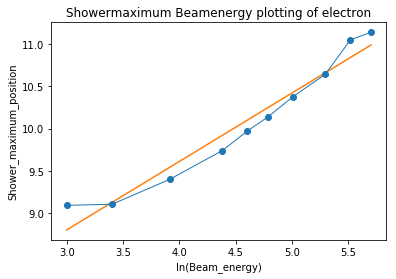

In [22]:
X0_meanvalue = df.groupby("energy").X0_meanvalue.median()
X0_meanvalue = X0_meanvalue.reset_index()
X0_variance = df.groupby("energy").X0_meanvalue.std()
X0_variance = X0_variance.reset_index()
beamenergy = df.groupby("energy").median()
beamenergy = beamenergy.reset_index()
Beamenergy = []
for energies in beamenergy.energy:
    energies = math.log(energies)
    Beamenergy.append(energies)
plt.errorbar(Beamenergy, beamenergy.X0_meanvalue, yerr=X0_variance.X0_meanvalue, fmt="o", linestyle='-', linewidth=1)
plt.xlabel("ln(Beam_energy)")
plt.ylabel("Shower_maximum_position")
plt.title("Showermaximum Beamenergy plotting of electron")
z1=np.polyfit(Beamenergy, beamenergy.X0_meanvalue,1)
p1=np.poly1d(z1)
print(p1)
yvals=p1(Beamenergy)
plot1=plt.plot(Beamenergy, yvals)
#plt.xlim(0,2.5)
#plt.ylim(0,12)
plt.show()

In [14]:
electron_runlist = hgc.runlist.query('Particle == "electron"')
electron_runlist = electron_runlist.query('Configuration == "22b"') 
electron_runlist = hgc.runlist.query("Particle == 'electron'").groupby("Energy").apply(lambda x : x.iloc[1])
energy = electron_runlist.Energy.values
electron_runlist

,Run,Date,Nevents,Particle,Energy,Configuration,CaloConfiguration
Energy,,,,,,,
20,437,2018-10-14 01:04:00,10274,electron,20,22b,1
30,595,2018-10-15 17:30:00,10291,electron,30,22b,1
50,457,2018-10-14 04:53:00,10050,electron,50,22b,1
80,467,2018-10-14 06:57:00,13423,electron,80,22b,1
100,479,2018-10-14 10:12:00,10240,electron,100,22b,1
120,621,2018-10-15 23:40:00,11361,electron,120,22b,1
150,494,2018-10-14 12:40:00,12220,electron,150,22b,1
200,665,2018-10-16 12:43:00,10239,electron,200,22b,1
250,385,2018-10-13 10:31:00,10161,electron,250,22b,1


In [15]:
run_numbers = electron_runlist.Run.values
X0_meanvalue = []
X0_variance = []
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_X0", "rechit_energy"])
    x0_max = hdf.query("rechit_layer == 28").rechit_X0.values[0]
    total_sum = hdf.groupby(["event", "rechit_X0"]).sum()
    total_sum = total_sum.reset_index()
    total_sum = total_sum.groupby("rechit_X0").median()
    total_sum = total_sum.reset_index()
    total_sum = total_sum[total_sum.rechit_X0 <= x0_max]
    total_sum["rechit_energy"] = total_sum["rechit_energy"]/total_sum["rechit_energy"].sum()
    rechitX0_sum = total_sum.rechit_X0
    rechit_energy_sum = total_sum.rechit_energy
    rechitX0_mean = (rechitX0_sum*rechit_energy_sum).sum()
    #rechitX0_variance = rechitX0.rechit_X0.std()
    X0_meanvalue.append(rechitX0_mean)
print (X0_meanvalue)
print (energy)
df = pd.DataFrame({
    "energy" : energy,
    "X0_meanvalue" : X0_meanvalue,
    })
#df.to_csv("Showermaximum_Beamenergy_plotting_electrons_22b.csv")
    #X0_variance.append(rechitX0_variance)
X0_meanvalue

[8.097662401539619, 8.475657934652116, 9.01699756948836, 9.504676733838453, 9.783597178467144, 9.986609474203666, 10.245811751295694, 10.542728132524413, 10.774445019103004, 10.920076712363864]
[ 20  30  50  80 100 120 150 200 250 300]


[8.097662401539619,
 8.475657934652116,
 9.01699756948836,
 9.504676733838453,
 9.783597178467144,
 9.986609474203666,
 10.245811751295694,
 10.542728132524413,
 10.774445019103004,
 10.920076712363864]

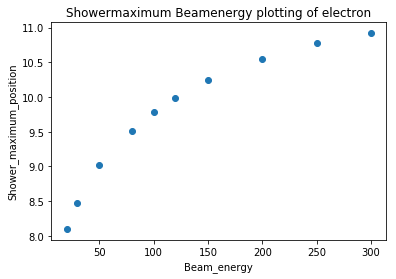

In [16]:
plt.scatter(energy, X0_meanvalue)
plt.xlabel("Beam_energy")
plt.ylabel("Shower_maximum_position")
plt.title("Showermaximum Beamenergy plotting of electron")
plt.show()

 
1.068 x + 4.865


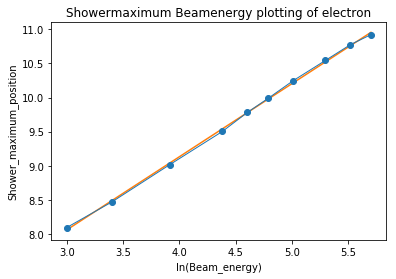

In [17]:
X0_meanvalue = df.groupby("energy").X0_meanvalue.median()
X0_meanvalue = X0_meanvalue.reset_index()
X0_variance = df.groupby("energy").X0_meanvalue.std()
X0_variance = X0_variance.reset_index()
beamenergy = df.groupby("energy").median()
beamenergy = beamenergy.reset_index()
Beamenergy = []
for energies in beamenergy.energy:
    energies = math.log(energies)
    Beamenergy.append(energies)
plt.errorbar(Beamenergy, beamenergy.X0_meanvalue, yerr=X0_variance.X0_meanvalue, fmt="o", linestyle='-', linewidth=1)
plt.xlabel("ln(Beam_energy)")
plt.ylabel("Shower_maximum_position")
plt.title("Showermaximum Beamenergy plotting of electron")
z1=np.polyfit(Beamenergy, beamenergy.X0_meanvalue,1)
p1=np.poly1d(z1)
print(p1)
yvals=p1(Beamenergy)
plot1=plt.plot(Beamenergy, yvals)
#plt.xlim(0,2.5)
#plt.ylim(0,12)
plt.show()